Topic:        Challenge Set 7  
Subject:      Classification  
Date:         10/15/2017  
Name:         Pradnya Nimkar

Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)

/Users/pradnyanimkar/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
column_names =['Class_Name',
'handicapped_infants',
'water-project-cost-sharing',
'adoption-of-the-budget-resolution',
'physician-fee-freeze',
'el-salvador-aid',
'religious-groups-schools',
'anti-satellite-test-ban',
'aid-to-nicaraguan-contras',
'mx-missile',
'immigration',
'synfuels-corporation-cutback',
'education-spending',
'superfund-right-to-sue',
'crime',
'duty-free-exports',
'export-administration-act-south-africa']

In [6]:
house_votes = pd.read_table('/Users/pradnyanimkar/ds/metis/metisgh/sf17_ds8_mycopy/Challenge8/house-votes-84_download.data',sep = ',',header = None, names = column_names)

In [7]:
house_votes.shape

(435, 17)

In [8]:
house_votes2 = house_votes.replace(['y','n', '?'],[1,0, None])

In [9]:
house_votes3 = house_votes2.fillna(house_votes2.mean())
house_votes3.head()

,Class_Name,handicapped_infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0.362,1.000,1.000,1.000,0.000,1.000
1,republican,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.813
2,democrat,0.442,1.000,1.000,0.417,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000
3,democrat,0.000,1.000,1.000,0.000,0.505,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000
4,democrat,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.423,1.000,1.000,1.000,1.000


In [10]:
house_votes3.columns

Index(['Class_Name', 'handicapped_infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

**Challenge 2**

Split the data into a test and training set

In [11]:
y = house_votes3['Class_Name']
X = house_votes3.loc[:,'handicapped_infants':'export-administration-act-south-africa'] 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Challenge 3**

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

```
from sklearn.metrics import accuracy_score
```

Which k value gives the highest accuracy?


In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.919540229885


In [14]:
y_pred

array(['democrat', 'democrat', 'republican', 'republican', 'republican',
       'republican', 'democrat', 'republican', 'republican', 'republican',
       'republican', 'democrat', 'democrat', 'democrat', 'republican',
       'democrat', 'republican', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'republican', 'democrat', 'republican',
       'democrat', 'democrat', 'democrat', 'democrat', 'republican',
       'republican', 'democrat', 'republican', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'republican',
       'democrat', 'democrat', 'republican', 'republican', 'democrat',
       'republican', 'democrat', 'democrat', 'republican', 'democrat',
       'democrat', 'republican', 'democrat', 'democrat', 'republican',
       'democrat', 'republican', 'democrat', 'republican', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'democrat',
       'republican', 'democrat', 'democrat', 'democrat', 'democrat',
       'demo

 The optimal value of k is 2


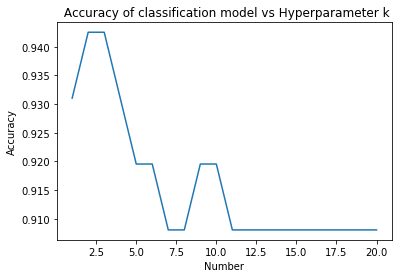

In [15]:
fit = []
k_value = []
for k in range(1,21):
    k_value.append(k)
    knn2 = KNeighborsClassifier(n_neighbors= k)
    knn2.fit(X_train, y_train)
    y_pred2 = knn2.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred2)
    fit.append(accuracy)

plt.plot(k_value, fit)
plt.xlabel("Number")
plt.ylabel("Accuracy")
plt.title(" Accuracy of classification model vs Hyperparameter k")
ind = fit.index(max(fit))
print(" The optimal value of k is", ind+1)


**Challenge 4**

Make a similar model but with `LogisticRegression` instead, calculate test accuracy.


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
log_acc = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()
log_acc

0.95822762508809023

**Challenge 5**

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.


In [17]:
import seaborn as sns

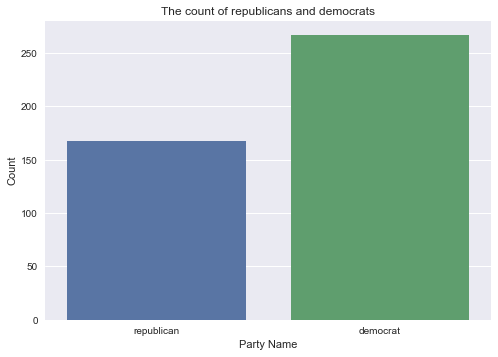

In [18]:
sns.countplot(x ='Class_Name', data = house_votes3 )
plt.title("The count of republicans and democrats")
plt.xlabel("Party Name")
plt.ylabel("Count")

In [19]:
len_x = X.shape[0]

In [20]:
house_votes3['Class_Name_D'] = "democrat"
house_votes3['Class_Name_R'] = "republican"
 
y2 = house_votes3['Class_Name_D']
y3 = house_votes3['Class_Name_R']

In [21]:
X = house_votes3.loc[:,'handicapped_infants':'export-administration-act-south-africa'] 

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=42)

In [23]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2, y_train2)
y_pred2 = knn2.predict(X_test2)
print(metrics.accuracy_score(y_test2, y_pred2))

1.0


In [24]:
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train3, y_train3)
y_pred3 = knn3.predict(X_test3)
print(metrics.accuracy_score(y_test3, y_pred3))

1.0


**Challenge 6**

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

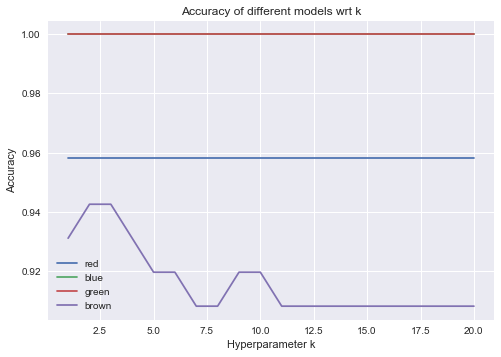

In [25]:
d_acc = []
r_acc = []
k_value2 = []

for k in range(1,21):
    k_value2.append(k)
    
    # Democrat prediction
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train2, y_train2)
    y_pred2 = knn2.predict(X_test2)
    acc1 = metrics.accuracy_score(y_test2, y_pred2)
    d_acc.append(acc1)
    
    # Republican prediction
    
    knn3 = KNeighborsClassifier(n_neighbors=k)
    knn3.fit(X_train3, y_train3)
    y_pred3 = knn3.predict(X_test3)
    acc2 = metrics.accuracy_score(y_test3, y_pred3)
    r_acc.append(acc2)

log_acc2 = [log_acc for i in range(0,len(r_acc))]
plt.plot(k_value2,log_acc2, label = 'red')
plt.plot(k_value2, d_acc, label ='blue')
plt.plot(k_value2, r_acc, label = 'green')
plt.plot(k_value2, fit, label = 'brown')
plt.xlabel("Hyperparameter k")
plt.ylabel("Accuracy")
plt.title("Accuracy of different models wrt k")
plt.legend()

In [26]:
len(log_acc2)

20

**Challenge 7**

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

```
from sklearn.learning_curve import learning_curve
```

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : )
Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

```
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
```

Before plotting `m` vs `train_cv_err` and `m` vs `test_cv_err`, where `train_err` and `test_err` are the vectors returned by the learning curve function. The `np.mean(...., axis=1)` means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.


In [27]:
from sklearn.learning_curve import learning_curve

/Users/pradnyanimkar/anaconda/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [28]:
X.shape

(435, 16)

In [29]:
y.shape

(435,)

In [30]:
estimator = KNeighborsClassifier()
m, train_err, ts_err = learning_curve(estimator, X, y, train_sizes = np.linspace(0.1,1,5), cv = 5)

In [31]:
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

In [32]:
plt.clf()

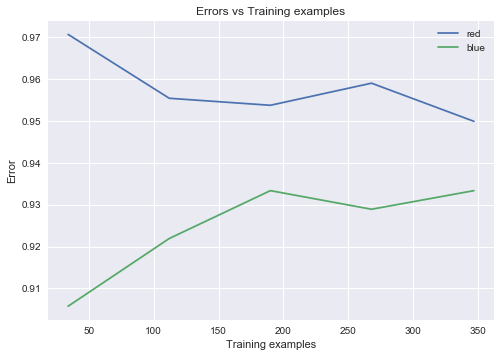

In [33]:
plt.plot(m,train_cv_err, label = 'red')
plt.plot(m,test_cv_err, label = 'blue')
plt.xlabel('Training examples')
plt.ylabel('Error')
plt.title('Errors vs Training examples')
plt.legend()

**Challenge 8**

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

```
from sklearn.naive_bayes import GaussianNB
```

SVM (Support Vector Machine) Classifier

```
from sklearn.svm import SVC
```

Decision Tree

```
from sklearn.tree import DecisionTreeClassifier
```

Random Forest

```
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred4 = nb.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred4))

0.942528735632


In [35]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred5 = svm.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred5))

0.954022988506


In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred6 = dtc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred6))

0.954022988506


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred6 = rfc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred6))

0.965517241379


**Challenge 9**

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

```
from sklearn.cross_validation import cross_val_score
```

Just like the `learning_curve` function, this takes a classifier object, `X` and `Y`. Returns accuracy (or whatever score you prefer by using the _scoring_ keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.


In [37]:
from sklearn.cross_validation import cross_val_score

In [40]:
rfc2 = cross_val_score(rfc, X, y, cv=10, scoring='accuracy').mean()
print("The cross validation scor for Random Forest is ", rfc2)

The cross validation scor for Random Forest is  0.951467331118


In [41]:
dtc2 = cross_val_score(dtc, X, y, cv=10, scoring='accuracy').mean()
print("The cross validation scor for Decision Tree is ", dtc2)

The cross validation scor for Decision Tree is  0.93528893587


In [42]:
svm2 = cross_val_score(dtc, X, y, cv=10, scoring='accuracy').mean()
print("The cross validation scor for Support Vector is ", svm2)

The cross validation scor for Support Vector is  0.935341789993


In [43]:
nb2 = cross_val_score(dtc, X, y, cv=10, scoring='accuracy').mean()
print("The cross validation scor for Naive Bayes is ", nb2)

The cross validation scor for Naive Bayes is  0.930688110339


**Challenge 10**

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.



In [66]:
house_votes4 = house_votes.replace(['y','n', '?'],['1','0', None])

In [67]:
mode_c = house_votes4['handicapped_infants'].mode()
mode_c
type(mode_c)

pandas.core.series.Series

In [68]:
print(mode_c)

0    0
dtype: object


In [73]:
house_votes4['handicapped_infants'].fillna('0', inplace = True) # Here we need to use mode
house_votes4.head()

,Class_Name,handicapped_infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,None,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,None
2,democrat,0,1,1,None,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,None,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,None,1,1,1,1


In [74]:
house_votes4.columns

Index(['Class_Name', 'handicapped_infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

In [108]:
for col in column_names[1:]:
    mode_c = house_votes4[col].mode()
    
    #mode_rev = mode_c[mode_c.find(" "): mode_c.find(" ")+1]
    print(type(mode_c[0]))
    house_votes4[col].fillna(mode_c[0], inplace = True)


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [109]:
y3 = house_votes4['handicapped_infants']
X3 = house_votes4.loc[:,'water-project-cost-sharing':'export-administration-act-south-africa'] 

In [110]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [111]:
X3.isnull().sum()

water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-schools                  0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

In [112]:
logreg3 = LogisticRegression()
log_acc3 = cross_val_score(logreg3, X3, y3, cv=10, scoring='accuracy').mean()
log_acc3

0.68735528037853622

**Challenge 11**

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [113]:
path = '/Users/pradnyanimkar/ds/metis/metisgh/sf17_ds8/challenges/challenges_data/2013_movies.csv'

In [114]:
movie_data = pd.read_csv(path,sep = ',')

In [115]:
movie_data.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

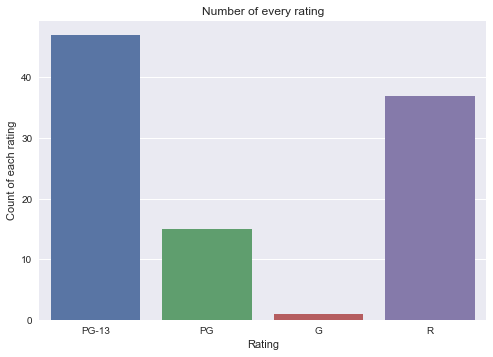

In [116]:
sns.countplot(x = 'Rating', data = movie_data)
plt.xlabel('Rating')
plt.ylabel('Count of each rating')
plt.title('Number of every rating')

In [117]:
import dateutil

In [128]:
mean_v = movie_data['Budget'].mean()
movie_data['Budget'].fillna(mean_v, inplace = True)

In [129]:
y4 = movie_data['Rating']
#X4 = movie_data.loc[:,['Budget', 'DomesticTotalGross','Runtime', 'ReleaseDate2']]
X4 = movie_data.loc[:,['Budget', 'DomesticTotalGross','Runtime']]

In [130]:
type(movie_data['ReleaseDate'])
movie_data['ReleaseDate2'] = movie_data['ReleaseDate'].apply(dateutil.parser.parse)
movie_data = movie_data[movie_data['Budget'] != None]

In [132]:
house_votes3 = house_votes2.fillna(house_votes2.mean())
house_votes3.head()

,Class_Name,handicapped_infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0.362,1.000,1.000,1.000,0.000,1.000
1,republican,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.813
2,democrat,0.442,1.000,1.000,0.417,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000
3,democrat,0.000,1.000,1.000,0.000,0.505,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000
4,democrat,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.423,1.000,1.000,1.000,1.000


In [133]:
X4.isnull().sum()

Budget                0
DomesticTotalGross    0
Runtime               0
dtype: int64

In [134]:
X4.describe()

,Budget,DomesticTotalGross,Runtime
count,100.000,100.000,100.000
mean,74747191.011,100596875.220,112.260
std,56018806.528,87396407.192,18.191
min,2500000.000,25568251.000,75.000
25%,30000000.000,42704130.250,98.000
50%,65500000.000,69542374.500,112.000
75%,103500000.000,120475940.250,123.000
max,225000000.000,424668047.000,180.000


In [135]:
X_train4, X_test4, y_train4, y_test4  = train_test_split( X4, y4 , test_size=0.2, random_state = 42)

In [136]:
movie_data.isnull().sum()

Title                 0
Budget                0
DomesticTotalGross    0
Director              4
Rating                0
Runtime               0
ReleaseDate           0
ReleaseDate2          0
dtype: int64

In [137]:
knn4 = KNeighborsClassifier(n_neighbors=5)
knn4.fit(X_train4, y_train4)
y_pred4 = knn4.predict(X_test4)
print(metrics.accuracy_score(y_test4, y_pred4))

0.7


In [211]:
logreg5 = LogisticRegression()
logreg5.fit(X4,y4)
log_acc6 = cross_val_score(logreg5, X4, y4, cv=3, scoring='accuracy').mean()
log_acc6

/Users/pradnyanimkar/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


0.50776515151515145

In [209]:
logreg5.coef_
#(list(zip(X5.columns,np.exp(logreg6.coef_))))

array([[ -9.02619557e-08,  -2.66712692e-09,  -2.48541998e-12],
       [ -9.77526625e-09,  -4.03654634e-09,  -1.66365800e-13],
       [  7.58297993e-09,  -3.76931490e-09,  -3.44374357e-14],
       [ -1.35935285e-08,   7.49823166e-10,   7.65419570e-14]])

In [210]:
np.exp(logreg5.coef_)

array([[ 0.99999991,  1.        ,  1.        ],
       [ 0.99999999,  1.        ,  1.        ],
       [ 1.00000001,  1.        ,  1.        ],
       [ 0.99999999,  1.        ,  1.        ]])

None of these variables have an impact on the Rating

**Challenge 12**

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: [Haberman Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)

 * What is the average and standard deviation of the age of all of the patients?
 * What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
 * What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
 * Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
 * What is the earliest year of surgery in this dataset?
 * What is the most recent year of surgery?
 * Use logistic regression to predict survival after 5 years. How well does your model do?
 * What are the coefficients of logistic regression? Which features affect the outcome how?
 * Draw the learning curve for logistic regression in this case.

In [140]:
path2 = '/Users/pradnyanimkar/ds/metis/metisgh/sf17_ds8_mycopy/Challenge8/haberman.data'

In [141]:
col_names = ['Age', 'year_ops', 'num_nodes', 'status']

In [142]:
haberman = pd.read_table(path2, header = None, names = col_names, sep =',')

In [143]:
haberman.head()

,Age,year_ops,num_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [181]:
print("Average age of all the patients is",haberman['Age'].mean())

Average age of all the patients is 52.45751633986928


In [145]:
print("Standard deviation in the ages of all the patiensts is",haberman['Age'].std())

Standard deviation in the ages of all the patiensts is 10.80345234930328


In [192]:
survived = haberman[haberman['status'] == 1]

In [193]:
survived.shape

(225, 4)

In [194]:
print("Average age of all the patiensts who survived is",survived['Age'].mean())

Average age of all the patiensts who survived is 52.01777777777778


In [195]:
print("Standard deviation in the ages of all the patiensts who survived is",survived['Age'].std())

Standard deviation in the ages of all the patiensts who survived is 11.012154179929546


In [196]:
no_survival = haberman[haberman['status'] == 2]

In [197]:
print("Average age of all the patiensts who did not survive",no_survival['Age'].mean())

Average age of all the patiensts who did not survive 53.67901234567901


In [198]:
print("Standard deviation of all the patiensts who did not survive",no_survival['Age'].std())

Standard deviation of all the patiensts who did not survive 10.16713720829741


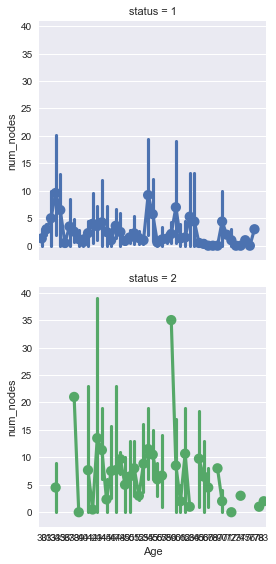

In [153]:
sns.factorplot(x = 'Age', y = 'num_nodes', hue = 'status' , row  = 'status' , data = haberman)
plt.figure(figsize=(30,40))

In [154]:
print("The earliest year of surgery in the data is", haberman['Age'].min())

The earliest year of surgery in the data is 30


In [155]:
print("The most recent year of surgery in the data is", haberman['Age'].max())

The most recent year of surgery in the data is 83


In [156]:
y5 = haberman['status']
X5 = haberman.loc[:,'Age':'num_nodes']

In [190]:
log_reg5 = LogisticRegression()

In [158]:
log_acc5 = cross_val_score(logreg5, X5, y5, cv=10, scoring='accuracy').mean()

In [159]:
print("The accuracy of the model is",log_acc5)

The accuracy of the model is 0.751659946237


In [169]:
logreg6 = LogisticRegression()
logreg6.fit(X5,y5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [180]:
X5.columns

Index(['Age', 'year_ops', 'num_nodes'], dtype='object')

In [170]:
logreg6.coef_

array([[ 0.01854689, -0.0345458 ,  0.08812314]])

In [191]:
(list(zip(X5.columns,np.exp(logreg6.coef_))))


[('Age', array([ 1.01871995,  0.9660441 ,  1.0921226 ]))]

The odds for Age and num_nodes are greater than 1, meaning they are positively associated with not survival status. 

Since status =1 survival beyond 5 years and 2 equals no survival beyond 5 years.
For approximately, one year older individual we expect the odds of not surviving beyond 5 years after the surgery go up by factor of 1.87%.

For one extra node, the odds of survival after 5 years of surgery go down by factor of 9.2%.

For one extra year after operation, the odds of survival after 5 years of surgery go down up factor of 3.3%. (1-0.966).

So, in the order of importance number of nodes, years after operation and then age of the individual.


In [160]:
estimator = LogisticRegression()
m, train_err, ts_err = learning_curve(estimator, X5, y5, train_sizes = np.linspace(0.1,1,5), cv = 5)

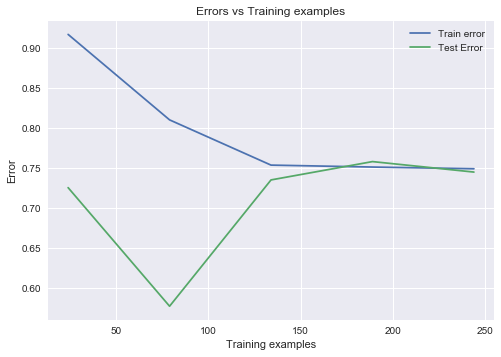

In [168]:
train_cv_err = np.mean(train_err, axis=1)
ts_cv_err = np.mean(ts_err, axis=1)
plt.plot(m,train_cv_err, label ='Train error')
plt.plot(m,ts_cv_err, label ='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Error')
plt.title('Errors vs Training examples')
plt.legend()